# KF Basics (Notes)


##### What is the need to describe belief in terms of PDF's?
This is because robot environments are stochastic. A robot environment may have cows with Tesla by side. That is a robot and it's environment cannot be deterministically modelled(e.g as a function of something like time t.). In the real world sensors are also error prone, and hence there'll be a set of values with a mean and variance that it can take. Hence, we always have to model around some mean and variances associated.

##### What is Expectation of a Random Variables?
 Expectation is nothing but an average of the probabilites
 
$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

In the continous form,

$$\mathbb E[X] = \int_{-\infty}^\infty x\, f(x) \,dx$$


In [2]:
import numpy as np
import random
x=[3,1,2]
p=[0.1,0.3,0.4]
E_x=np.sum(np.multiply(x,p))
print(E_x)

1.4000000000000001


##### What is the advantage of representing the belief as a unimodal as opposed to multimodal?
Obviously, it makes sense because we can't multiple probabilities to a car moving for two locations. This would be too confusing and the information will not be useful.

## Variance, Covariance and Correlation

### Variance
Variance is the spread of the data. The mean does'nt tell much **about** the data. Therefore the variance tells us about the **story** about the data meaning the spread of the data.

$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$

In [3]:
x=np.random.randn(10)
np.var(x)

1.0224618077401504

### Covariance

This is for a multivariate distribution. For example, a robot in 2-D space can take values in both x and y. To describe them, a normal distribution with mean in both x and y is needed.

For a multivariate distribution, mean $\mu can be represented as a matrix, 

$$
\mu = \begin{bmatrix}\mu_1\\\mu_2\\ \vdots \\\mu_n\end{bmatrix}
$$


Similarly, variance can also be represented.

But an important concept is that in the same way as every variable or dimension has a variation in its values, it is also possible that there will be values on how they **together vary**. This is also a measure of how two datasets are related to each other or **correlation**.

For example, as height increases weight also generally increases. These variables are correlated. They are positively correlated because as one variable gets larger so does the other.

We use a **covariance matrix** to denote covariances of a multivariate normal distribution:
$$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$

**Diagonal** - Variance of each variable associated. 

**Off-Diagonal** - covariance between ith and jth variables.

$$\begin{aligned}VAR(X) = \sigma_x^2 &=  \frac{1}{n}\sum_{i=1}^n(X - \mu)^2\\
COV(X, Y) = \sigma_{xy} &= \frac{1}{n}\sum_{i=1}^n[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$

In [4]:
x=np.random.random((3,3))
np.cov(x)

array([[0.08868895, 0.05064471, 0.08855629],
       [0.05064471, 0.06219243, 0.11555291],
       [0.08855629, 0.11555291, 0.21534324]])

Covariance taking the data as **sample** with $\frac{1}{N-1}$

In [17]:
x_cor=np.random.rand(1,10)
y_cor=np.random.rand(1,10)
np.cov(x_cor,y_cor)

array([[ 0.1571437 , -0.00766623],
       [-0.00766623,  0.13957621]])

Covariance taking the data as **population** with $\frac{1}{N}$

In [18]:
np.cov(x_cor,y_cor,bias=1)

array([[ 0.14142933, -0.0068996 ],
       [-0.0068996 ,  0.12561859]])

# Gaussians 




#### Central Limit Theorem

According to this theorem, the average of n samples of random and independant variables tends to follow a normal distribution as we increase the sample size.(Generally, for n>=30)

(array([ 1.,  2.,  7.,  9., 13., 23., 17., 15., 10.,  3.]),
 array([5.28148425, 5.32037699, 5.35926973, 5.39816247, 5.43705521,
        5.47594795, 5.51484068, 5.55373342, 5.59262616, 5.6315189 ,
        5.67041164]),
 <a list of 10 Patch objects>)

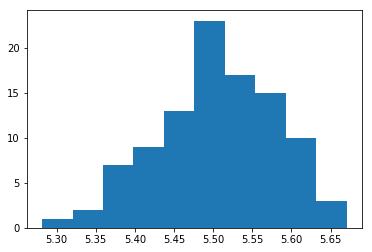

In [72]:
import matplotlib.pyplot as plt
import random
a=np.zeros((100,))
for i in range(100):
    x=[random.uniform(1,10) for _ in range(1000)]
    a[i]=np.sum(x,axis=0)/1000
plt.hist(a)

##### Gaussian Distribution
A Gaussian is a *continuous probability distribution* that is completely described with two parameters, the mean ($\mu$) and the variance ($\sigma^2$). It is defined as:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]
$$
Range is [$-\inf,\inf $]


This is just a function of mean($\mu$) and standard deviation ($\sigma$) and what gives the normal distribution the charecteristic **bell curve**. 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


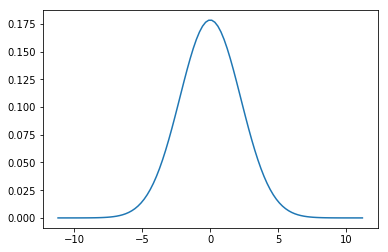

In [75]:
import matplotlib.mlab as mlab
import math
mu = 0
variance = 5
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


##### Why do we need Gaussian distributions?
Since it becomes really difficult in the real world to deal with multimodal distribution as we cannot put the belief in two seperate location of the robots. This becomes really confusing and in practice impossible to comprehend. 
Gaussian probability distribution allows us to drive the robots using only one mode with peak at the mean with some variance.

## Gaussian Properties

**Multiplication**


For the measurement update in a Bayes Filter, the algorithm tells us to multiply the Prior P(X_t) and measurement P(Z_t|X_t) to calculate the posterior:

$$P(X \mid Z) = \frac{P(Z \mid X)P(X)}{P(Z)}$$

Here for the numerator,  $P(Z \mid X),P(X)$ both are gaussian.

$N(\bar\mu, \bar\sigma^1)$ and $N(\bar\mu, \bar\sigma^2)$ are their mean and variances.

New mean is 

$$\mu_\mathtt{new} = \frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2}$$
New variance is
$$
\sigma_\mathtt{new} = \frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}
$$

**Addition**

The motion step involves a case of adding up probability (Since it has to abide the Law of Total Probability). This means their beliefs are to be added and hence two gaussians. They are simply arithmetic additions of the two.

$$\begin{gathered}\mu_x = \mu_p + \mu_z \\
\sigma_x^2 = \sigma_z^2+\sigma_p^2\, \square\end{gathered}$$

### References:

1. Roger Labbe's [repo](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python) on Kalman Filters. (Majority of the examples in the notes are from this)



2. Probabilistic Robotics by Sebastian Thrun, Wolfram Burgard and Dieter Fox, MIT Press.
